In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

In [12]:
# Loading in one-hot-encoded data and names of subjects for each row

simpleHiq = np.load("./hiq-1hot-simple.npy")
hiqInfo = np.load("./names.npy")

In [13]:
for item in simpleHiq[0]:
    if item != 0.0 and item != 1.0:
        print item

In [14]:
# PCA 
#pca = NMF(n_components=3)

pca = PCA(n_components=2)
ipca = IncrementalPCA(batch_size=100, n_components=2)
transformedHiq = pca.fit_transform(simpleHiq)

In [15]:
hiq_split = np.array_split(simpleHiq, 6)

In [16]:
for index, item in enumerate(hiq_split):
    print "Index: ", index
    ipca.partial_fit(item)

Index:  0
Index:  1
Index:  2
Index:  3
Index:  4
Index:  5


In [17]:
iterativeTransformed = ipca.transform(simpleHiq)

In [20]:
iterativeTransformed.dump("iterativePCA.npy")

In [21]:
transformedHiq.dump("noniterativePCA.npy")

In [8]:
iterativeTransformed, '\n', transformedHiq

(array([[  4.29964101,  20.61084062],
        [  5.30924371,  21.44513664],
        [  4.53830492,  20.93757231],
        ..., 
        [-35.02620975,  -1.14077999],
        [-35.09779926,  -0.47400539],
        [-33.64057466,  -1.61728571]]),
 '\n',
 array([[ -4.27992536,  20.62590796],
        [ -5.34383793,  21.48196203],
        [ -4.53285954,  20.99869876],
        ..., 
        [ 35.03622021,  -1.18794032],
        [ 35.09389571,  -0.50673461],
        [ 33.65800233,  -1.7096094 ]]))

In [9]:
iterativeTransformed.shape

NameError: name 'iterativeTransformed' is not defined

In [18]:
# Copied from http://www.1000genomes.org/category/phenotype

pop_to_super_pop = {
  "CHB":"EAS",
  "JPT":"EAS",
  "CHS":"EAS",
  "CDX":"EAS",
  "KHV":"EAS",
  "CEU":"EUR",
  "TSI":"EUR",
  "FIN":"EUR",
  "GBR":"EUR",
  "IBS":"EUR",
  "YRI":"AFR",
  "LWK":"AFR",
  "MSI":"AFR",#added
  "GWD":"AFR",
  "MSL":"AFR",
  "ESN":"AFR",
  "ASW":"AFR",
  "ACB":"AFR",
  "MXL":"AMR",
  "PUR":"AMR",
  "CLM":"AMR",
  "PEL":"AMR",
  "GIH":"SAS",
  "PJL":"SAS",
  "BEB":"SAS",
  "STU":"SAS",
  "ITU":"SAS",
  "asian-pgp":"EAS",
  "white-pgp":"EUR",
  "ethiopian-pgp":"AFR",
  "columbian-pgp":"AMR"
}
pop_human_readable = {
  "CHB":["Han Chinese in Bejing, China",'yellowgreen'], #None in 433
  "JPT":["Japanese in Tokyo, Japan",'mediumspringgreen'], #None in 433
  "CHS":["Southern Han chinese",'forestgreen'], #93 in 433
  "CDX":["Chinese Dai in Xishuangbanna, China",'mediumseagreen'], #None in 433
  "KHV":["Kinh in Ho Chi Minh City, Vietnam", 'lawngreen'], #6 in 433
  "asian-pgp":["PGP participants of Asian ancestry", 'olive'],

  "CEU":["Utah Residents (CEPH) with Northern and Western European Ancestry",'darkviolet'], #96 in 433
  "TSI":["Toscani in Italia",'darkslateblue'], #None in 433
  "FIN":["Finnish in Finland",'blueviolet'], #None in 433
  "GBR":["British in England and Scotland",'darkmagenta'], #None in 433
  "IBS":["Iberian Population in Spain",'indigo'], #None in 433
  "white-pgp":["PGP participants of European ancestry",'magenta'],

  "YRI":["Yoruba in Ibadan, Nigeria",'maroon'], #80 in 433
  "LWK":["Luhya in Webuye, Kenya",'sandybrown'], #11 in 433
  "MSI":["Maasai from Kenya", 'peru'],#None in 433, added!
  "GWD":["Gambian in Western Divisions in the Gambia",'sienna'], #None in 433
  "MSL":["Mende in Sierra Leone",'goldenrod'], #None in 433
  "ESN":["Esan in Nigeria",'tan'], #None in 433
  "ASW":["Americans of African Ancestry in SW USA",'brown'], #None in 433
  "ACB":["African Caribbeans in Barbados",'burlywood'], #None in 433
  "ethiopian-pgp":["PGP Ethiopian participant", 'black'],

  "MXL":["Mexican Ancestry from Los Angeles USA",'tomato'], #None in 433
  "PUR":["Puerto Ricans from Puerto Rico",'orangered'], #6 in 433
  "CLM":["Colombians from Medellin, Colombia",'coral'], #None in 433
  "PEL":["Peruvians from Lima, Peru",'palevioletred'], #94 in 433
  "columbian-pgp":["PGP Columbian participant", 'darkorange'],

  "GIH":["Gujarati Indian from Houston, Texas",'cyan'], #None in 433
  "PJL":["Punjabi from Lahore, Pakistan",'darkturquoise'], #47 in 433
  "BEB":["Bengali from Bangladesh", 'darkcyan'], #None in 433
  "STU":["Sri Lankan Tamil from the UK",'aquamarine'], #None in 433
  "ITU":["Indian Telugu from the UK",'lightseagreen'], #None in 433
}
super_pop_human_readable = {
  "EAS":["East Asian", 'g'],
  "EUR":["European", 'darkviolet'],
  "AFR":["African", 'brown'],
  "AMR":["Ad Mixed American", 'darkorange'],
  "SAS":["South Asian", 'c']
}


In [19]:
# Loading subject phenotype information

filePGP = './PGP_assigned_ethnicities.csv'
file1000G = './1000G_ethnicities_20130606_sample_info.csv'
#file3 = '/home/swz/Downloads/1000G_ethnicities_69_hashed_together.csv'

PGPeth = pd.read_csv(filePGP) 
G1000 = pd.read_csv(file1000G) 

In [20]:
# Converting Population to Superpopulation, and getting colors for population and superpopulation for plotting

G1000['SuperPopulation'] = G1000['Population'].apply(lambda x: pop_to_super_pop[x])
G1000['ColorSuper'] = G1000['SuperPopulation'].apply(lambda x: super_pop_human_readable[x][1])
G1000['SuperPopHumanRead']=  G1000['SuperPopulation'].apply(lambda x: super_pop_human_readable[x][0])
G1000['Color'] = G1000['Population'].apply(lambda x: pop_human_readable[x][1])
G1000['PopHumRead'] = G1000['Population'].apply(lambda x: pop_human_readable[x][1])

g2 = lambda x:x[0:x.find(b"-")]
results = [g2(i).decode("utf-8") for i in hiqInfo]

df = pd.DataFrame(results,columns={'Sample'})

df2 =  df.merge(G1000,on = 'Sample', how='left')
df2['Color'] = df2.Color.fillna('w')
df2['ColorSuper'] = df2.ColorSuper.fillna('w')

In [21]:
colors = df2['Color'].values.tolist()
clabels = df2['PopHumRead'].values.tolist()

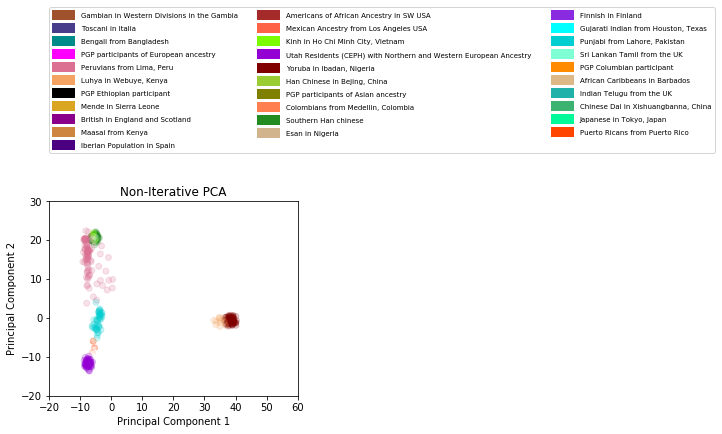

In [22]:
# Plotting data against first two principle components

xlabel="Principal Component 1"
ylabel="Principal Component 2"

plt.figure()
plt.scatter(transformedHiq[:,0], transformedHiq[:,1], c = colors, alpha=0.2)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.gca().set_xlim([-20,60])
plt.gca().set_ylim([-20,30])

# Add custom legend
vals = list(pop_human_readable.values())
legcolors = [v[1] for v in vals]
labels = [v[0] for v in vals]

leghandle = []

for ix,cc in enumerate(legcolors):
    leghandle.append(mpatches.Rectangle((0,0),0.2,0.2, facecolor=cc,
                            edgecolor=cc, linewidth=3,label=labels[ix]))

plt.legend(handles=leghandle, bbox_to_anchor=(0, 2.), loc=2, borderaxespad=0,ncol = 3)
plt.title("Non-Iterative PCA")

leg = plt.gca().get_legend()
ltext  = leg.get_texts()  
llines = leg.get_lines()  
frame  = leg.get_frame()  

plt.setp(ltext, fontsize='x-small')    # the legend text fontsize
plt.setp(llines, linewidth=1.5)  

plt.gcf().subplots_adjust(right=0.7, top=0.8)
plt.savefig('./PCA12-Pop.png',format='png',dpi=300, transparent=False)

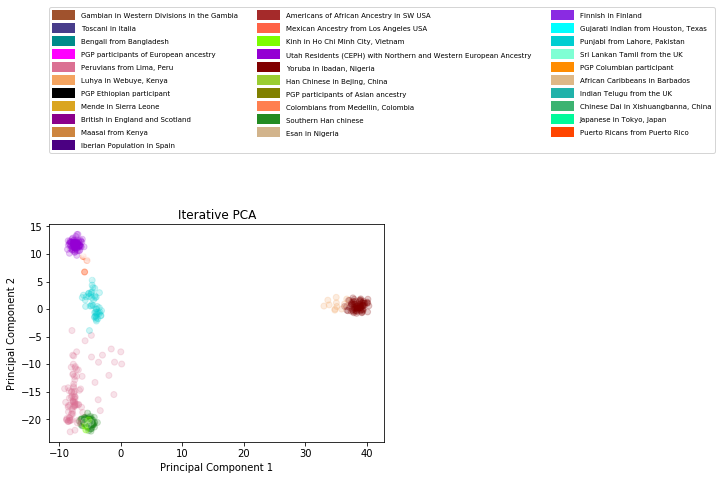

In [23]:
# Plotting data against first two principle components

xlabel="Principal Component 1"
ylabel="Principal Component 2"

plt.figure()
plt.scatter(iterativeTransformed[:,0], iterativeTransformed[:,1], c = colors, alpha=0.2)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# Add custom legend
vals = list(pop_human_readable.values())
legcolors = [v[1] for v in vals]
labels = [v[0] for v in vals]

leghandle = []

for ix,cc in enumerate(legcolors):
    leghandle.append(mpatches.Rectangle((0,0),0.2,0.2, facecolor=cc,
                            edgecolor=cc, linewidth=3,label=labels[ix]))

plt.legend(handles=leghandle, bbox_to_anchor=(0, 2.), loc=2, borderaxespad=0,ncol = 3)
plt.title("Iterative PCA")

leg = plt.gca().get_legend()
ltext  = leg.get_texts()  
llines = leg.get_lines()  
frame  = leg.get_frame()  

plt.setp(ltext, fontsize='x-small')    # the legend text fontsize
plt.setp(llines, linewidth=1.5)  

#plt.gcf().subplots_adjust(right=0.7, top=0.8)
plt.savefig('./IPCA12-Pop.png',format='png',dpi=300)